# Q2: QAOA

In this problem, we will use Qiskit to build QAOA instances to solve MaxCut problems.

## Q2 (a)
Follow the instructions to complete the implementation. When you don't know how to use a function, search for its documentation.

First, we will create the graph for the MaxCut problem. Use `networkx`'s `random_regular_graph()` to generate a **3**-regular graph with 10 nodes. Use seed 6657.

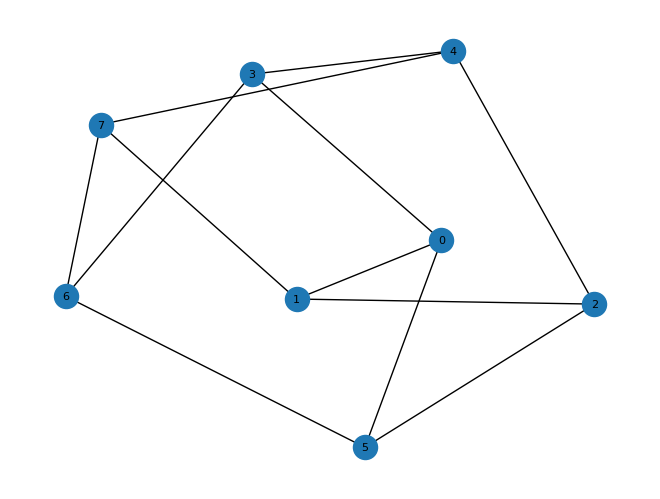

In [ ]:
import networkx as nx

n = 8
seed = 6657

graph = nx.random_regular_graph(3, n, seed)
nx.draw(graph, with_labels=True, node_size=300, font_size=8)

Next, use the `Maxcut` class from `qiskit_optimization` to instantiate the problem. Construct the Hamiltonian with `.to_quadratic_program()` and `.to_ising()`.

In [ ]:
# TOD
!pip install qiskit-optimization

from qiskit_optimization.applications import Maxcut
max_cut = Maxcut(graph)
hamiltonian, offset = max_cut.to_quadratic_program().to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(hamiltonian))


Offset: -6.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIZZ', 'IIIIZIIZ', 'IIZIIIIZ', 'IIIIIZZI', 'ZIIIIIZI', 'IIIZIZII', 'IIZIIZII', 'IIIZZIII', 'IZIIZIII', 'ZIIZIIII', 'IZZIIIII', 'ZZIIIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


Let's use a classical approach, `NumPyMinimumEigensolver` in `qiskit_algorithms`, to compute the true ground state energy of the Hamiltonian, which corresponds to the negative of the maximum cut of this problem instance.
We will use it as the denominator in approximate ratio (AR) calculation.  (Nothing to be done in this code block.)

In [ ]:
from qiskit_algorithms import NumPyMinimumEigensolver

ground_state_energy = NumPyMinimumEigensolver().compute_minimum_eigenvalue(hamiltonian).eigenvalue.real + offset
print(ground_state_energy)

-10.0


It is important to supply a high quality initial point for QAOA. Here we use package `qokit`. (Nothing to be done in this code block.)

In [ ]:
import numpy as np
from qokit.parameter_utils import get_fixed_gamma_beta

def get_initial_point(p):
    gamma, beta = get_fixed_gamma_beta(3, p)
    return np.concatenate([-np.array(beta), np.array(gamma) / 2]) # make up for different conventions

Finally, use the preparations above and the starter code below to write a function that takes in the QAOA depth (as known as $p$) and outputs the approximation ratio of the found solution.

In [ ]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import Sampler
from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import COBYLA

# TODO
def run_qaoa(depth: int, noise_model: NoiseModel | None = None) -> float:
    sampler = Sampler(
        run_options={"shots": 10000, "seed": seed},
        backend_options={"noise_model": noise_model, "device": "CPU"}
    )

    optimizer = COBYLA(maxiter=10000)
    initial_point = get_initial_point(depth)


    qaoa = QAOA(
        sampler=sampler,
        optimizer=optimizer,
        reps=depth,
        initial_point=initial_point
    )

    result = qaoa.compute_minimum_eigenvalue(hamiltonian)

    ground_state_energy = result.eigenvalue.real
    max_cut_value = -(ground_state_energy + offset)

    return max_cut_value

As a sanity check, the output below should be around 0.83. (Nothing to be done in this code block.)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

run_qaoa(1) / -ground_state_energy

np.float64(0.8327600000000001)

## Q2 (b) QAOA performance vs depth
Use the function you wrote, make a plot of approximation ratio vs QAOA depth for depth from 1 to 6.

Running QAOA with depth 1...
Depth 1: MaxCut = 8.328, Approximation Ratio = 0.833
Running QAOA with depth 2...
Depth 2: MaxCut = 9.247, Approximation Ratio = 0.925
Running QAOA with depth 3...
Depth 3: MaxCut = 9.662, Approximation Ratio = 0.966
Running QAOA with depth 4...
Depth 4: MaxCut = 9.840, Approximation Ratio = 0.984
Running QAOA with depth 5...
Depth 5: MaxCut = 9.931, Approximation Ratio = 0.993
Running QAOA with depth 6...
Depth 6: MaxCut = 9.967, Approximation Ratio = 0.997


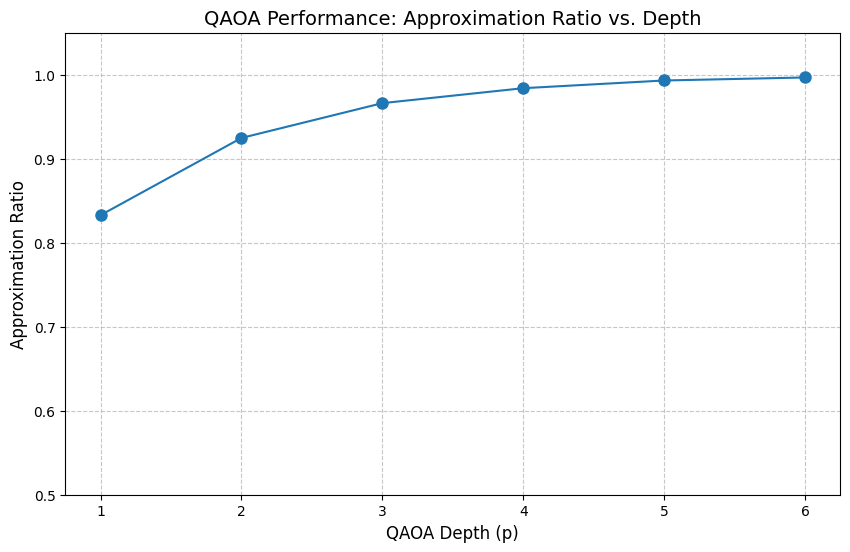

In [ ]:
# TODO
import matplotlib.pyplot as plt
depths = np.arange(1, 7)
approximation_ratios = []

for p in depths:
    print(f"Running QAOA with depth {p}...")
    max_cut_value = run_qaoa(p)
    ratio = max_cut_value / (-ground_state_energy)
    approximation_ratios.append(ratio)
    print(f"Depth {p}: MaxCut = {max_cut_value:.3f}, Approximation Ratio = {ratio:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, approximation_ratios, 'o-', markersize=8)
plt.xlabel("QAOA Depth (p)", fontsize=12)
plt.ylabel("Approximation Ratio", fontsize=12)
plt.title("QAOA Performance: Approximation Ratio vs. Depth", fontsize=14)
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.05)
plt.show()

## Q2 (c) Noise impact on performance
Add two-qubit depolarizing noise with error rates 0 (noiseless), 0.001, and 00.1 to CNOT gates and make the same plot with three curves, each corresponding to an error rate. This can take a while to run.


=== Running experiments with error rate: 0 ===
Processing depth 1...
Depth 1 | Error 0 | Ratio: 0.833
Processing depth 2...
Depth 2 | Error 0 | Ratio: 0.925
Processing depth 3...
Depth 3 | Error 0 | Ratio: 0.966
Processing depth 4...
Depth 4 | Error 0 | Ratio: 0.984
Processing depth 5...
Depth 5 | Error 0 | Ratio: 0.993
Processing depth 6...
Depth 6 | Error 0 | Ratio: 0.997

=== Running experiments with error rate: 0.001 ===
Processing depth 1...
Depth 1 | Error 0.001 | Ratio: 0.830
Processing depth 2...
Depth 2 | Error 0.001 | Ratio: 0.919
Processing depth 3...
Depth 3 | Error 0.001 | Ratio: 0.956
Processing depth 4...
Depth 4 | Error 0.001 | Ratio: 0.968
Processing depth 5...
Depth 5 | Error 0.001 | Ratio: 0.976
Processing depth 6...
Depth 6 | Error 0.001 | Ratio: 0.974

=== Running experiments with error rate: 0.01 ===
Processing depth 1...
Depth 1 | Error 0.01 | Ratio: 0.813
Processing depth 2...
Depth 2 | Error 0.01 | Ratio: 0.875
Processing depth 3...
Depth 3 | Error 0.01 | Rati

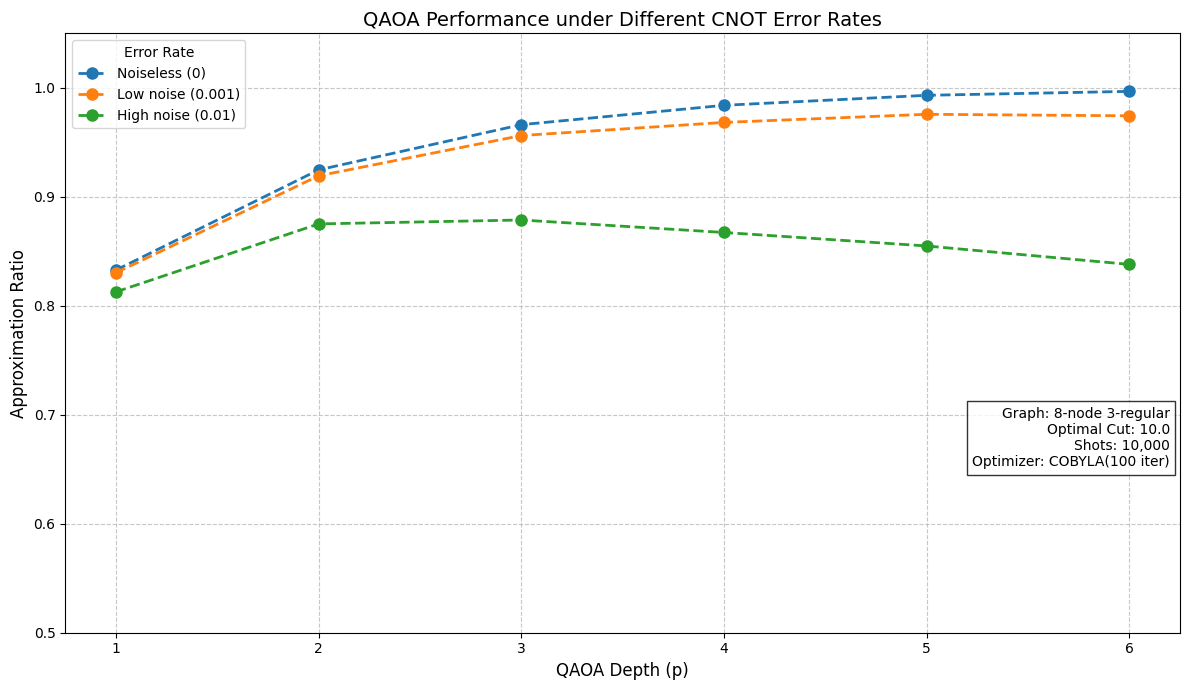

In [ ]:
# TODO
from qiskit_aer.noise import NoiseModel, depolarizing_error
def create_noise_model(error_rate: float) -> NoiseModel | None:
    if error_rate == 0:
        return None

    noise_model = NoiseModel()
    cnot_error = depolarizing_error(error_rate, 2)
    noise_model.add_all_qubit_quantum_error(cnot_error, ['cx'])
    return noise_model

error_rates = [0, 0.001, 0.01]
noise_models = {rate: create_noise_model(rate) for rate in error_rates}

depths = np.arange(1, 7)
results = {rate: [] for rate in error_rates}


for rate in error_rates:
    print(f"\n=== Running experiments with error rate: {rate} ===")
    current_ratios = []

    for p in depths:
        print(f"Processing depth {p}...")
        max_cut = run_qaoa(p, noise_models[rate])
        ratio = max_cut / -ground_state_energy
        current_ratios.append(ratio)
        print(f"Depth {p} | Error {rate} | Ratio: {ratio:.3f}")

    results[rate] = current_ratios

plt.figure(figsize=(12, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = [
    'Noiseless (0)',
    'Low noise (0.001)',
    'High noise (0.01)'
]

for (rate, color, label) in zip(error_rates, colors, labels):
    plt.plot(
        depths,
        results[rate],
        'o--',
        color=color,
        linewidth=2,
        markersize=8,
        label=label
    )

plt.xlabel("QAOA Depth (p)", fontsize=12)
plt.ylabel("Approximation Ratio", fontsize=12)
plt.title("QAOA Performance under Different CNOT Error Rates", fontsize=14)
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Error Rate", fontsize=10)
plt.ylim(0.5, 1.05)

plt.text(
    6.2, 0.65,
    f"Graph: {n}-node 3-regular\n"
    f"Optimal Cut: {-ground_state_energy}\n"
    f"Shots: 10,000\n"
    f"Optimizer: COBYLA(100 iter)",
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.savefig('qaoa_noise_comparison.png', dpi=300)
plt.show()